In [1]:
pip install hmmlearn

  Obtaining dependency information for hmmlearn from https://files.pythonhosted.org/packages/6b/62/0c7b618eac6f27220baecdfe476259e005c690bf825d02a3cb8e5470bf2c/hmmlearn-0.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 186.2 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/125.4 kB 363.1 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/125.4 kB 363.1 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/125.4 kB 363.1 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/125.4 kB 363.1 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/125.4 kB 186.7 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/125.4 kB 186.7 kB/s eta 0:00:01
   ------------

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [4]:
pip install numpy==1.21

  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build numpy
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [206 lines of output]
  setup.py:63: RuntimeWarning: NumPy 1.21.0 may not yet support Python 3.11.
    warnings.warn(
  Running from numpy source directory.
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_bounded_integers.pyx.in
  Processing numpy/random\_common.pyx
  Processing numpy/random\_generator.pyx
  Processing numpy/random\_mt19937.pyx
  Processing numpy/random\_pcg64.pyx
  Processing numpy/random\_philox.pyx
  Processing numpy/random\_sfc64.pyx
  Cythonizing sources
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\SaiSu\\anaconda3\\lib', 'C:\\', 'C:\\Users\\SaiSu\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
    libraries blis not found in ['C:\\Users\\S

In [3]:
pip install librosa

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from hmmlearn import hmm

def load_audio_speech(file_path):
    signal, sample_rate = librosa.load(file_path, sr=None)
    return signal, sample_rate

def calculate_stft(signal, sample_rate):
    stft_matrix = np.abs(librosa.stft(signal))
    return stft_matrix

def train_hidden_markov_model(features, num_components=3, num_iterations=100):
    model = hmm.GaussianHMM(n_components=num_components, covariance_type="diag", n_iter=num_iterations)
    model.fit(features)
    return model

def visualize_stft(stft_matrix, sample_rate):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft_matrix, ref=np.max), sr=sample_rate, x_axis='time', y_axis='log', cmap='inferno') # Change the colormap here
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT Visualization')
    plt.show()

def classify_audio_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

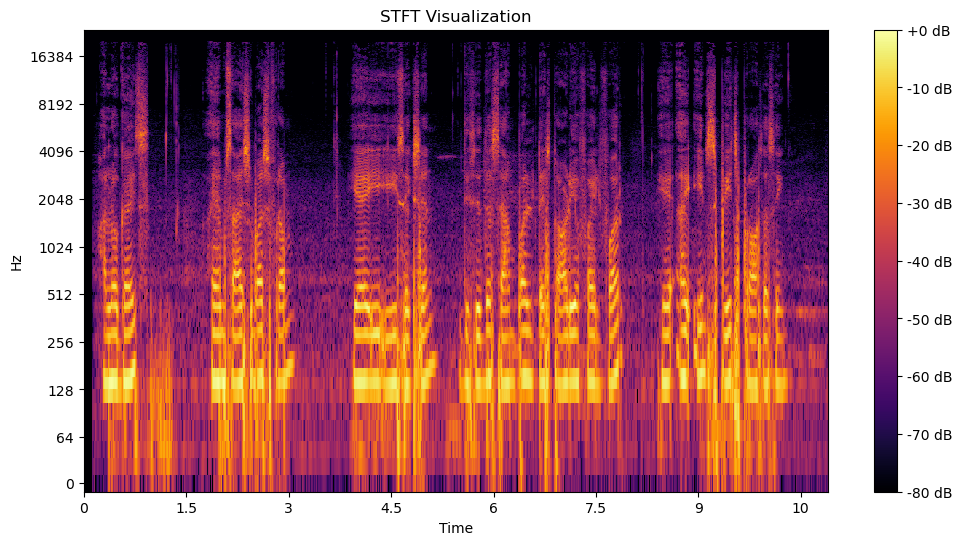

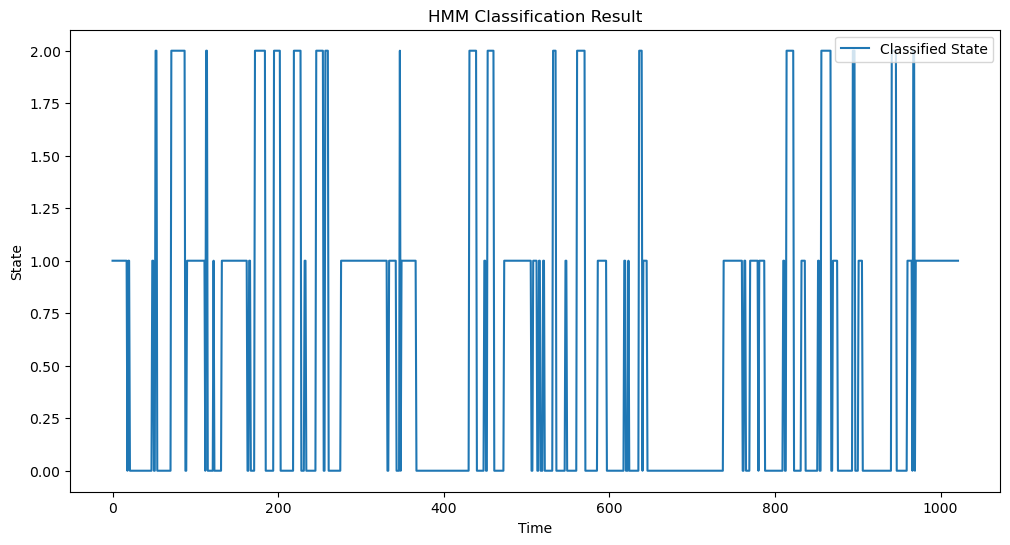

HMM Model Parameters:
Transition Matrix:
[[0.90774907 0.05719558 0.03505535]
 [0.08933718 0.91066282 0.        ]
 [0.14393936 0.         0.85606064]]
Means:
[[2.07331955e+00 4.45629206e+00 6.41783809e+00 ... 2.14487007e-04
  2.22562133e-04 2.04081317e-04]
 [6.59365509e-01 1.65377678e+00 2.44594161e+00 ... 1.51797758e-04
  1.48800899e-04 1.41913785e-04]
 [4.20283182e+00 9.33383931e+00 1.32579015e+01 ... 2.64779746e-04
  2.56684923e-04 2.25716177e-04]]
Covariances:
[[[1.09696442e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 3.57201787e+01 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 7.52539801e+01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.85684551e-05
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   1.86548645e-05 0.00000000e+00]
  [0.00000000e+00 0.0

In [29]:
def main():
    audio_file_path = r"C:\Users\SaiSu\Downloads\Subbu.wav"
    
    # Load audio
    signal, sample_rate = load_audio_speech(audio_file_path)
    
    # Extract STFT features
    stft = calculate_stft(signal, sample_rate)
    
    # Plot STFT
    visualize_stft(stft, sample_rate)
    
    # Train HMM
    model = train_hidden_markov_model(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_audio_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
if __name__ == "__main__":
    main()